# Lecture 8

A recent [interesting paper](https://arxiv.org/pdf/2207.08815.pdf) compared the performance of Machine Learning algorithms on large number of tabular datasets. The datasets have been currated into a [kaggle competition](https://www.kaggle.com/competitions/bench-tab-v1). 

I've downloaded the datasets via kaggle API and unzip it to find the following:

In [1]:
!ls Train

334_361110     335_361101     336_361074     336_361088     337_361070
334_361111     335_361102     336_361076     336_361279     337_361273
334_361113     335_361103     336_361077     336_361280     337_361274
334_361282     335_361104     336_361078     336_361281     337_361275
334_361283     335_361287     336_361079     337_361055     337_361276
334_361285     335_361288     336_361080     337_361060     337_361277
334_361286     335_361289     336_361081     337_361061     337_361278
335_361093     335_361291     336_361082     337_361062     dict_suit.json
335_361094     335_361292     336_361083     337_361063     dict_task.json
335_361096     335_361293     336_361084     337_361065     submission.csv
335_361097     335_361294     336_361085     337_361066
335_361098     336_361072     336_361086     337_361068
335_361099     336_361073     336_361087     337_361069


In [2]:
!ls Train/334_361110

attribute_names.json       data_train.parquet
categorical_indicator.json target_train.parquet
data_test.parquet


Lets investigate the contents of some of these files:

In [3]:
!cat Train/dict_suit.json

{"334": [361110, 361111, 361113, 361282, 361283, 361285, 361286], "335": [361093, 361094, 361096, 361097, 361098, 361099, 361101, 361102, 361103, 361104, 361287, 361288, 361289, 361291, 361292, 361293, 361294], "336": [361072, 361073, 361074, 361076, 361077, 361078, 361079, 361080, 361081, 361082, 361083, 361084, 361085, 361086, 361087, 361088, 361279, 361280, 361281], "337": [361055, 361060, 361061, 361062, 361063, 361065, 361066, 361068, 361069, 361070, 361273, 361274, 361275, 361276, 361277, 361278]}

In [4]:
!cat Train/dict_task.json

{"336": {"features": "num", "target": "num"}, "337": {"features": "num", "target": "cat"}, "335": {"features": "num+cat", "target": "num"}, "334": {"features": "num+cat", "target": "cat"}}

In [5]:
import json
json.load(open("Train/dict_task.json","r"))

{'336': {'features': 'num', 'target': 'num'},
 '337': {'features': 'num', 'target': 'cat'},
 '335': {'features': 'num+cat', 'target': 'num'},
 '334': {'features': 'num+cat', 'target': 'cat'}}

In [6]:
datasets=json.load(open("Train/dict_suit.json","r"))

These json files seems to separate the datasets:

* 334: Classification with numerical and categorical inputs.
* 335: Regression with numerical and categorical inputs.
* 336: Regression with numerical inputs only.
* 337: Classification with numerical only.

Every dataset sits in it own directory, and contains the fillowing files:

In [7]:
!ls Train/334_361110

attribute_names.json       data_train.parquet
categorical_indicator.json target_train.parquet
data_test.parquet


In [8]:
!cat Train/334_361110/attribute_names.json

["date", "day", "period", "nswprice", "nswdemand", "vicprice", "vicdemand", "transfer"]

In [9]:
!cat Train/334_361110/categorical_indicator.json

[false, true, false, false, false, false, false, false]

In [10]:
cat_list = json.load(open("Train/334_361110/categorical_indicator.json","r"))
cat_list

[False, True, False, False, False, False, False, False]

In [11]:
num_cat, num_not_cat = sum(cat_list), len(cat_list)-sum(cat_list)
num_cat, num_not_cat

(1, 7)

## Check

Lets do some checks on all of these data sets.

First thing, lets see if any of these datasets have missing values. I'll work out a way to test this on one file first:

In [12]:
import pandas as pd
df = pd.read_parquet("Train/334_361110/data_train.parquet")

In [13]:
df.isnull()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
1027,False,False,False,False,False,False,False,False
28781,False,False,False,False,False,False,False,False
17825,False,False,False,False,False,False,False,False
33852,False,False,False,False,False,False,False,False
7502,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6265,False,False,False,False,False,False,False,False
11284,False,False,False,False,False,False,False,False
38158,False,False,False,False,False,False,False,False
860,False,False,False,False,False,False,False,False


So this should test if there are any null values:

In [14]:
import numpy as np
np.any(df.isnull())

False

The shape of the `DataFrame` will tell me the number of datapoints and columns:

In [15]:
df.shape

(23084, 8)

Now lets look at target file:

In [16]:
df = pd.read_parquet("Train/334_361110/target_train.parquet")

In [17]:
df

,target
1027,0
28781,1
17825,0
33852,1
7502,0
...,...
6265,0
11284,0
38158,1
860,0


That's clearly a binary classification dataset. Lets look at a regression one:

In [18]:
df = pd.read_parquet("Train/336_361079/target_train.parquet")
df

,price
3032,10.614008
21981,12.385477
2094,10.768506
21574,9.615805
12850,10.292179
...,...
11964,10.322231
21575,10.518700
5390,10.566201
860,10.264687


Lets now look at every dataset and confirm some things. To determine if it's a classification or regression task, we can look at the target files:

In [19]:
!ls Train/*/target_train.parquet

Train/334_361110/target_train.parquet Train/336_361079/target_train.parquet
Train/334_361111/target_train.parquet Train/336_361080/target_train.parquet
Train/334_361113/target_train.parquet Train/336_361081/target_train.parquet
Train/334_361282/target_train.parquet Train/336_361082/target_train.parquet
Train/334_361283/target_train.parquet Train/336_361083/target_train.parquet
Train/334_361285/target_train.parquet Train/336_361084/target_train.parquet
Train/334_361286/target_train.parquet Train/336_361085/target_train.parquet
Train/335_361093/target_train.parquet Train/336_361086/target_train.parquet
Train/335_361094/target_train.parquet Train/336_361087/target_train.parquet
Train/335_361096/target_train.parquet Train/336_361088/target_train.parquet
Train/335_361097/target_train.parquet Train/336_361279/target_train.parquet
Train/335_361098/target_train.parquet Train/336_361280/target_train.parquet
Train/335_361099/target_train.parquet Train/336_361281/target_train.parquet
Train/335_36

Lets make a list of these filenames so we can open them up one by one:

In [20]:
import glob 
import numpy as np
target_files = glob.glob("Train/*/target_train.parquet")
target_files

['Train/335_361288/target_train.parquet',
 'Train/334_361283/target_train.parquet',
 'Train/334_361282/target_train.parquet',
 'Train/335_361289/target_train.parquet',
 'Train/334_361285/target_train.parquet',
 'Train/335_361287/target_train.parquet',
 'Train/336_361072/target_train.parquet',
 'Train/336_361086/target_train.parquet',
 'Train/337_361274/target_train.parquet',
 'Train/336_361081/target_train.parquet',
 'Train/337_361273/target_train.parquet',
 'Train/336_361088/target_train.parquet',
 'Train/337_361070/target_train.parquet',
 'Train/335_361102/target_train.parquet',
 'Train/336_361074/target_train.parquet',
 'Train/336_361080/target_train.parquet',
 'Train/336_361279/target_train.parquet',
 'Train/336_361087/target_train.parquet',
 'Train/336_361073/target_train.parquet',
 'Train/337_361275/target_train.parquet',
 'Train/335_361103/target_train.parquet',
 'Train/335_361104/target_train.parquet',
 'Train/337_361065/target_train.parquet',
 'Train/337_361062/target_train.pa

Now lets open them up one by one and take a look. 

In [21]:
classification_datasets = list()
regression_datasets = list()
binary_classification_datasets = list()
multiclass_classification_datasets = list()

dataset_summary = dict()

for target_file in target_files:
    # Load Dataset
    df = pd.read_parquet(target_file)

    # Extract the name from the file path
    dataset_name = target_file.split("/")[1]

    # Get number of training datapoints
    n_train = df.shape[0]
    
    # Check the target type is float
    a_value = df[df.columns[0]].to_numpy()[0]
    float_check = isinstance(a_value,np.float64)
    
    # Check number of unique targets
    n_unique = len(np.unique(df))
    
    # Open training set, check various things
    df_train = pd.read_parquet("train/"+dataset_name+"/data_train.parquet")
    if df_train.shape[0] != n_train:
        print ("Warning, dataset", dataset_name, "has mismatch of train/target rows.")
        
    n_features = df_train.shape[1]
    any_null = np.any(df_train.isnull())
    
    cat_list = json.load(open("Train/"+dataset_name+"/categorical_indicator.json","r"))
    num_cat, num_not_cat = sum(cat_list), len(cat_list)-sum(cat_list)
              
    # Lets see if we can deterimine the type of task based on the target:
    binary_classification = n_unique == 2
    multiclass_classification = n_unique < n_train/10 and not binary_classification
    regression = not binary_classification and not multiclass_classification

    if binary_classification:
        binary_classification_datasets.append(dataset_name)
        classification_datasets.append(dataset_name)
        
    if multiclass_classification:
        multiclass_classification_datasets.append(dataset_name)
        classification_datasets.append(dataset_name)
    
    if regression:
        regression_datasets.append(dataset_name)
        
    dataset_summary[dataset_name] = [dataset_name, binary_classification, 
                                     multiclass_classification, regression, n_train,
                                    any_null,n_features, num_cat, num_not_cat] 
        

In [22]:
print (len(binary_classification_datasets))
print (len(multiclass_classification_datasets))
print (len(regression_datasets))

23
18
18


In [23]:
dataset_summary

{'335_361288': ['335_361288', False, True, False, 2506, False, 8, 1, 7],
 '334_361283': ['334_361283', True, False, False, 7963, False, 21, 1, 20],
 '334_361282': ['334_361282', True, False, False, 34951, False, 31, 10, 21],
 '335_361289': ['335_361289', False, True, False, 31218, False, 4, 2, 2],
 '334_361285': ['334_361285', True, False, False, 67057, False, 32, 3, 29],
 '335_361287': ['335_361287', False, False, True, 5331, False, 255, 3, 252],
 '336_361072': ['336_361072', False, True, False, 4915, False, 21, 0, 21],
 '336_361086': ['336_361086', False, False, True, 97839, False, 3, 0, 3],
 '337_361274': ['337_361274', True, False, False, 34548, False, 54, 0, 54],
 '336_361081': ['336_361081', False, False, True, 6415, False, 8, 0, 8],
 '337_361273': ['337_361273', True, False, False, 42654, False, 7, 0, 7],
 '336_361088': ['336_361088', False, False, True, 12757, False, 79, 0, 79],
 '337_361070': ['337_361070', True, False, False, 4564, False, 20, 0, 20],
 '335_361102': ['335_3611

In [24]:
from IPython.display import HTML, display
import tabulate

display(HTML(tabulate.tabulate(dataset_summary.values(), tablefmt='html', 
                               headers=["Name", "Binary", "Multi", "Regression", 
                                        "N Train", "Any Null", "N Features", "N Cat", "N non-Cat"])))

Name,Binary,Multi,Regression,N Train,Any Null,N Features,N Cat,N non-Cat
335_361288,False,True,False,2506,0,8,1,7
334_361283,True,False,False,7963,0,21,1,20
334_361282,True,False,False,34951,0,31,10,21
335_361289,False,True,False,31218,0,4,2,2
334_361285,True,False,False,67057,0,32,3,29
335_361287,False,False,True,5331,0,255,3,252
336_361072,False,True,False,4915,0,21,0,21
336_361086,False,False,True,97839,0,3,0,3
337_361274,True,False,False,34548,0,54,0,54
336_361081,False,False,True,6415,0,8,0,8


## Dataset loading



In [25]:
def load_dataset(dataset_name):
    df_train = pd.read_parquet("Train/"+dataset_name+"/data_train.parquet")
    df_target = pd.read_parquet("Train/"+dataset_name+"/target_train.parquet")
    cat_list = json.load(open("Train/"+dataset_name+"/categorical_indicator.json","r"))
    attrib_list = json.load(open("Train/"+dataset_name+"/attribute_names.json","r"))
    
    return {"Training":df_train, "Target":df_target, "Categorical":cat_list, "Attributes": attrib_list}

In [26]:
# These are the classifications with categorical and numerical values
datasets["334"]

[361110, 361111, 361113, 361282, 361283, 361285, 361286]

In [27]:
# Lets select the binary classification datasets
list(filter(lambda t: t[1][1],dataset_summary.items()))

[('334_361283', ['334_361283', True, False, False, 7963, False, 21, 1, 20]),
 ('334_361282', ['334_361282', True, False, False, 34951, False, 31, 10, 21]),
 ('334_361285', ['334_361285', True, False, False, 67057, False, 32, 3, 29]),
 ('337_361274', ['337_361274', True, False, False, 34548, False, 54, 0, 54]),
 ('337_361273', ['337_361273', True, False, False, 42654, False, 7, 0, 7]),
 ('337_361070', ['337_361070', True, False, False, 4564, False, 20, 0, 20]),
 ('337_361275', ['337_361275', True, False, False, 7963, False, 20, 0, 20]),
 ('337_361065', ['337_361065', True, False, False, 8025, False, 10, 0, 10]),
 ('337_361062', ['337_361062', True, False, False, 6049, False, 26, 0, 26]),
 ('334_361113', ['334_361113', True, False, False, 254208, False, 54, 44, 10]),
 ('337_361055', ['337_361055', True, False, False, 10028, False, 10, 0, 10]),
 ('337_361063', ['337_361063', True, False, False, 8092, False, 16, 0, 16]),
 ('334_361286', ['334_361286', True, False, False, 2979, False, 11, 8

In [28]:
binary_classification = list(map(lambda x: x[0],filter(lambda t: t[1][1],dataset_summary.items())))
multi_classification = list(map(lambda x: x[0],filter(lambda t: t[1][2],dataset_summary.items())))
regression = list(map(lambda x: x[0],filter(lambda t: t[1][3],dataset_summary.items())))


In [29]:
d1=load_dataset(binary_classification[0])

In [30]:
d1["Training"]

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
7249,30000.0,1,22,0.0,0.0,0.0,2.0,0.0,0.0,27444.0,...,29886.0,28392.0,22612.0,22750.0,2000.0,1800.0,0.0,1000.0,1000.0,0.0
8814,50000.0,0,41,4.0,3.0,2.0,0.0,0.0,-1.0,52955.0,...,50307.0,27707.0,28479.0,28979.0,0.0,0.0,0.0,974.0,31100.0,1200.0
2083,310000.0,1,42,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0,-606.0,...,19950.0,79227.0,20097.0,25594.0,45484.0,20033.0,79520.0,94.0,25910.0,10933.0
7735,150000.0,0,56,2.0,0.0,0.0,0.0,0.0,0.0,116928.0,...,43045.0,40813.0,42164.0,43465.0,5006.0,3000.0,1452.0,5000.0,5000.0,2000.0
10646,120000.0,1,33,0.0,0.0,0.0,-1.0,-1.0,0.0,35563.0,...,19747.0,1201.0,2333.0,2250.0,1426.0,6400.0,1500.0,2700.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,50000.0,1,50,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,50000.0,1,34,0.0,0.0,-1.0,-1.0,-1.0,-1.0,2435.0,...,197.0,2995.0,19515.0,0.0,0.0,197.0,2995.0,19515.0,0.0,3734.0
5390,10000.0,0,27,0.0,0.0,0.0,0.0,0.0,0.0,9457.0,...,7335.0,9025.0,7886.0,8382.0,1107.0,1310.0,2000.0,269.0,1000.0,1100.0
860,50000.0,1,23,0.0,0.0,0.0,0.0,-1.0,0.0,48482.0,...,11151.0,-2897.0,48211.0,48154.0,2500.0,3002.0,1500.0,52000.0,1900.0,1800.0


In [31]:
d1["Training"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7963 entries, 7249 to 7270
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x1      7963 non-null   float64 
 1   x2      7963 non-null   category
 2   x5      7963 non-null   uint8   
 3   x6      7963 non-null   float64 
 4   x7      7963 non-null   float64 
 5   x8      7963 non-null   float64 
 6   x9      7963 non-null   float64 
 7   x10     7963 non-null   float64 
 8   x11     7963 non-null   float64 
 9   x12     7963 non-null   float64 
 10  x13     7963 non-null   float64 
 11  x14     7963 non-null   float64 
 12  x15     7963 non-null   float64 
 13  x16     7963 non-null   float64 
 14  x17     7963 non-null   float64 
 15  x18     7963 non-null   float64 
 16  x19     7963 non-null   float64 
 17  x20     7963 non-null   float64 
 18  x21     7963 non-null   float64 
 19  x22     7963 non-null   float64 
 20  x23     7963 non-null   float64 
dtypes: category

In [32]:
list(zip(d1["Attributes"],d1["Categorical"]))

[('x1', False),
 ('x2', True),
 ('x5', False),
 ('x6', False),
 ('x7', False),
 ('x8', False),
 ('x9', False),
 ('x10', False),
 ('x11', False),
 ('x12', False),
 ('x13', False),
 ('x14', False),
 ('x15', False),
 ('x16', False),
 ('x17', False),
 ('x18', False),
 ('x19', False),
 ('x20', False),
 ('x21', False),
 ('x22', False),
 ('x23', False)]

In [33]:
d1["Training"].columns

Index(['x1', 'x2', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13',
       'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23'],
      dtype='object')

## First Visualization

For binary classification tasks, we want compare histograms each feature for the two categories.

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([3247., 1515., 1411.,  746.,  520.,  269.,  225.,   14.,    7.,
           9.]),
 array([ 10000.,  84000., 158000., 232000., 306000., 380000., 454000.,
        528000., 602000., 676000., 750000.]),
 <BarContainer object of 10 artists>)

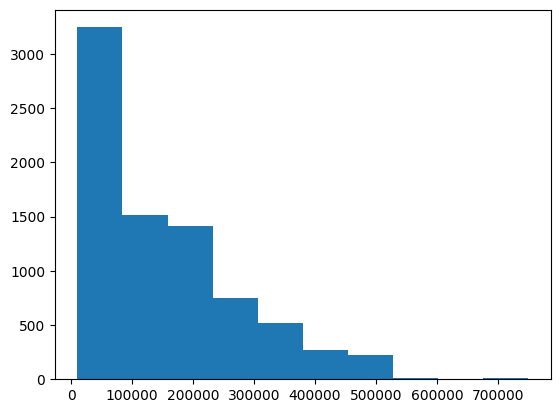

In [35]:
plt.hist(d1["Training"][d1["Training"].columns[0]])

In [36]:
d1["Training"][(d1["Target"]==0).to_numpy()]

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
2083,310000.0,1,42,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0,-606.0,...,19950.0,79227.0,20097.0,25594.0,45484.0,20033.0,79520.0,94.0,25910.0,10933.0
5147,20000.0,0,34,1.0,2.0,0.0,0.0,0.0,0.0,15095.0,...,12607.0,16430.0,19230.0,0.0,0.0,6000.0,5000.0,3000.0,0.0,0.0
675,20000.0,1,32,0.0,0.0,0.0,2.0,0.0,0.0,18539.0,...,21274.0,20109.0,19976.0,20143.0,1400.0,3300.0,0.0,1000.0,1000.0,1000.0
2545,130000.0,1,27,0.0,0.0,0.0,0.0,0.0,0.0,107599.0,...,112635.0,114472.0,117556.0,116090.0,4030.0,4600.0,4200.0,5000.0,5000.0,21932.0
3999,80000.0,1,26,0.0,0.0,0.0,0.0,0.0,0.0,78513.0,...,80131.0,75920.0,75421.0,73991.0,3000.0,5000.0,3500.0,8000.0,3000.0,3200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,110000.0,1,46,0.0,0.0,0.0,0.0,0.0,0.0,45846.0,...,48325.0,0.0,49461.0,48438.0,2000.0,2000.0,2000.0,0.0,2000.0,2000.0
5734,280000.0,1,31,1.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,...,0.0,0.0,5360.0,251.0,0.0,0.0,0.0,5360.0,251.0,5360.0
5191,50000.0,1,34,0.0,0.0,-1.0,-1.0,-1.0,-1.0,2435.0,...,197.0,2995.0,19515.0,0.0,0.0,197.0,2995.0,19515.0,0.0,3734.0
5390,10000.0,0,27,0.0,0.0,0.0,0.0,0.0,0.0,9457.0,...,7335.0,9025.0,7886.0,8382.0,1107.0,1310.0,2000.0,269.0,1000.0,1100.0


In [37]:
import math
import scipy

def compare_features_binary(d,logscale=False):
    # Divide the data into separate dfs for the two categories
    
    df_0=d["Training"][(d["Target"]==0).to_numpy()]
    df_1=d["Training"][(d["Target"]==1).to_numpy()]
    
    print("Number of catogory 0:",df_0.shape[0])
    print("Number of catogory 1:",df_1.shape[0])
    
    # Make a grid of plots
    N_Features = d["Training"].shape[1]
    N_X= math.ceil(math.sqrt(N_Features))
    N_Y= math.floor(math.sqrt(N_Features))
    if N_X*N_Y<N_Features:
        N_Y+=1

    print("Found",N_Features,"features. Creating grid of",N_X,"by",N_Y)
    
    # Histogram Features
    plt.figure(figsize=(50,50))

    for i,column in enumerate(df_0.columns):
        KS_test=scipy.stats.kstest(df_0[column],df_1[column]).statistic
        print(column,"KS Distribution Similarity Test:", KS_test)
        
        plt.subplot(N_X,N_Y,i+1)
        plt.title(str(KS_test))
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column],bins=100, histtype="step", color="red",label="0",density=1, stacked=True)
        plt.hist(df_1[column],bins=100, histtype="step", color="blue",label="1",density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)
        
    plt.show()

Number of catogory 0: 3977
Number of catogory 1: 3986
Found 21 features. Creating grid of 5 by 5
x1 KS Distribution Similarity Test: 0.1839387945816392
x2 KS Distribution Similarity Test: 0.051325351579409
x5 KS Distribution Similarity Test: 0.035603616933847296
x6 KS Distribution Similarity Test: 0.3664396925573427
x7 KS Distribution Similarity Test: 0.28981691136478305
x8 KS Distribution Similarity Test: 0.2562117398321836
x9 KS Distribution Similarity Test: 0.21962612164956025
x10 KS Distribution Similarity Test: 0.18702786885101122
x11 KS Distribution Similarity Test: 0.17472235297768995
x12 KS Distribution Similarity Test: 0.046387147573711915
x13 KS Distribution Similarity Test: 0.03605629509670571
x14 KS Distribution Similarity Test: 0.026697729203330592
x15 KS Distribution Similarity Test: 0.029461929930517435
x16 KS Distribution Similarity Test: 0.028074751446507333
x17 KS Distribution Similarity Test: 0.03414010893798398
x18 KS Distribution Similarity Test: 0.1499028344238780

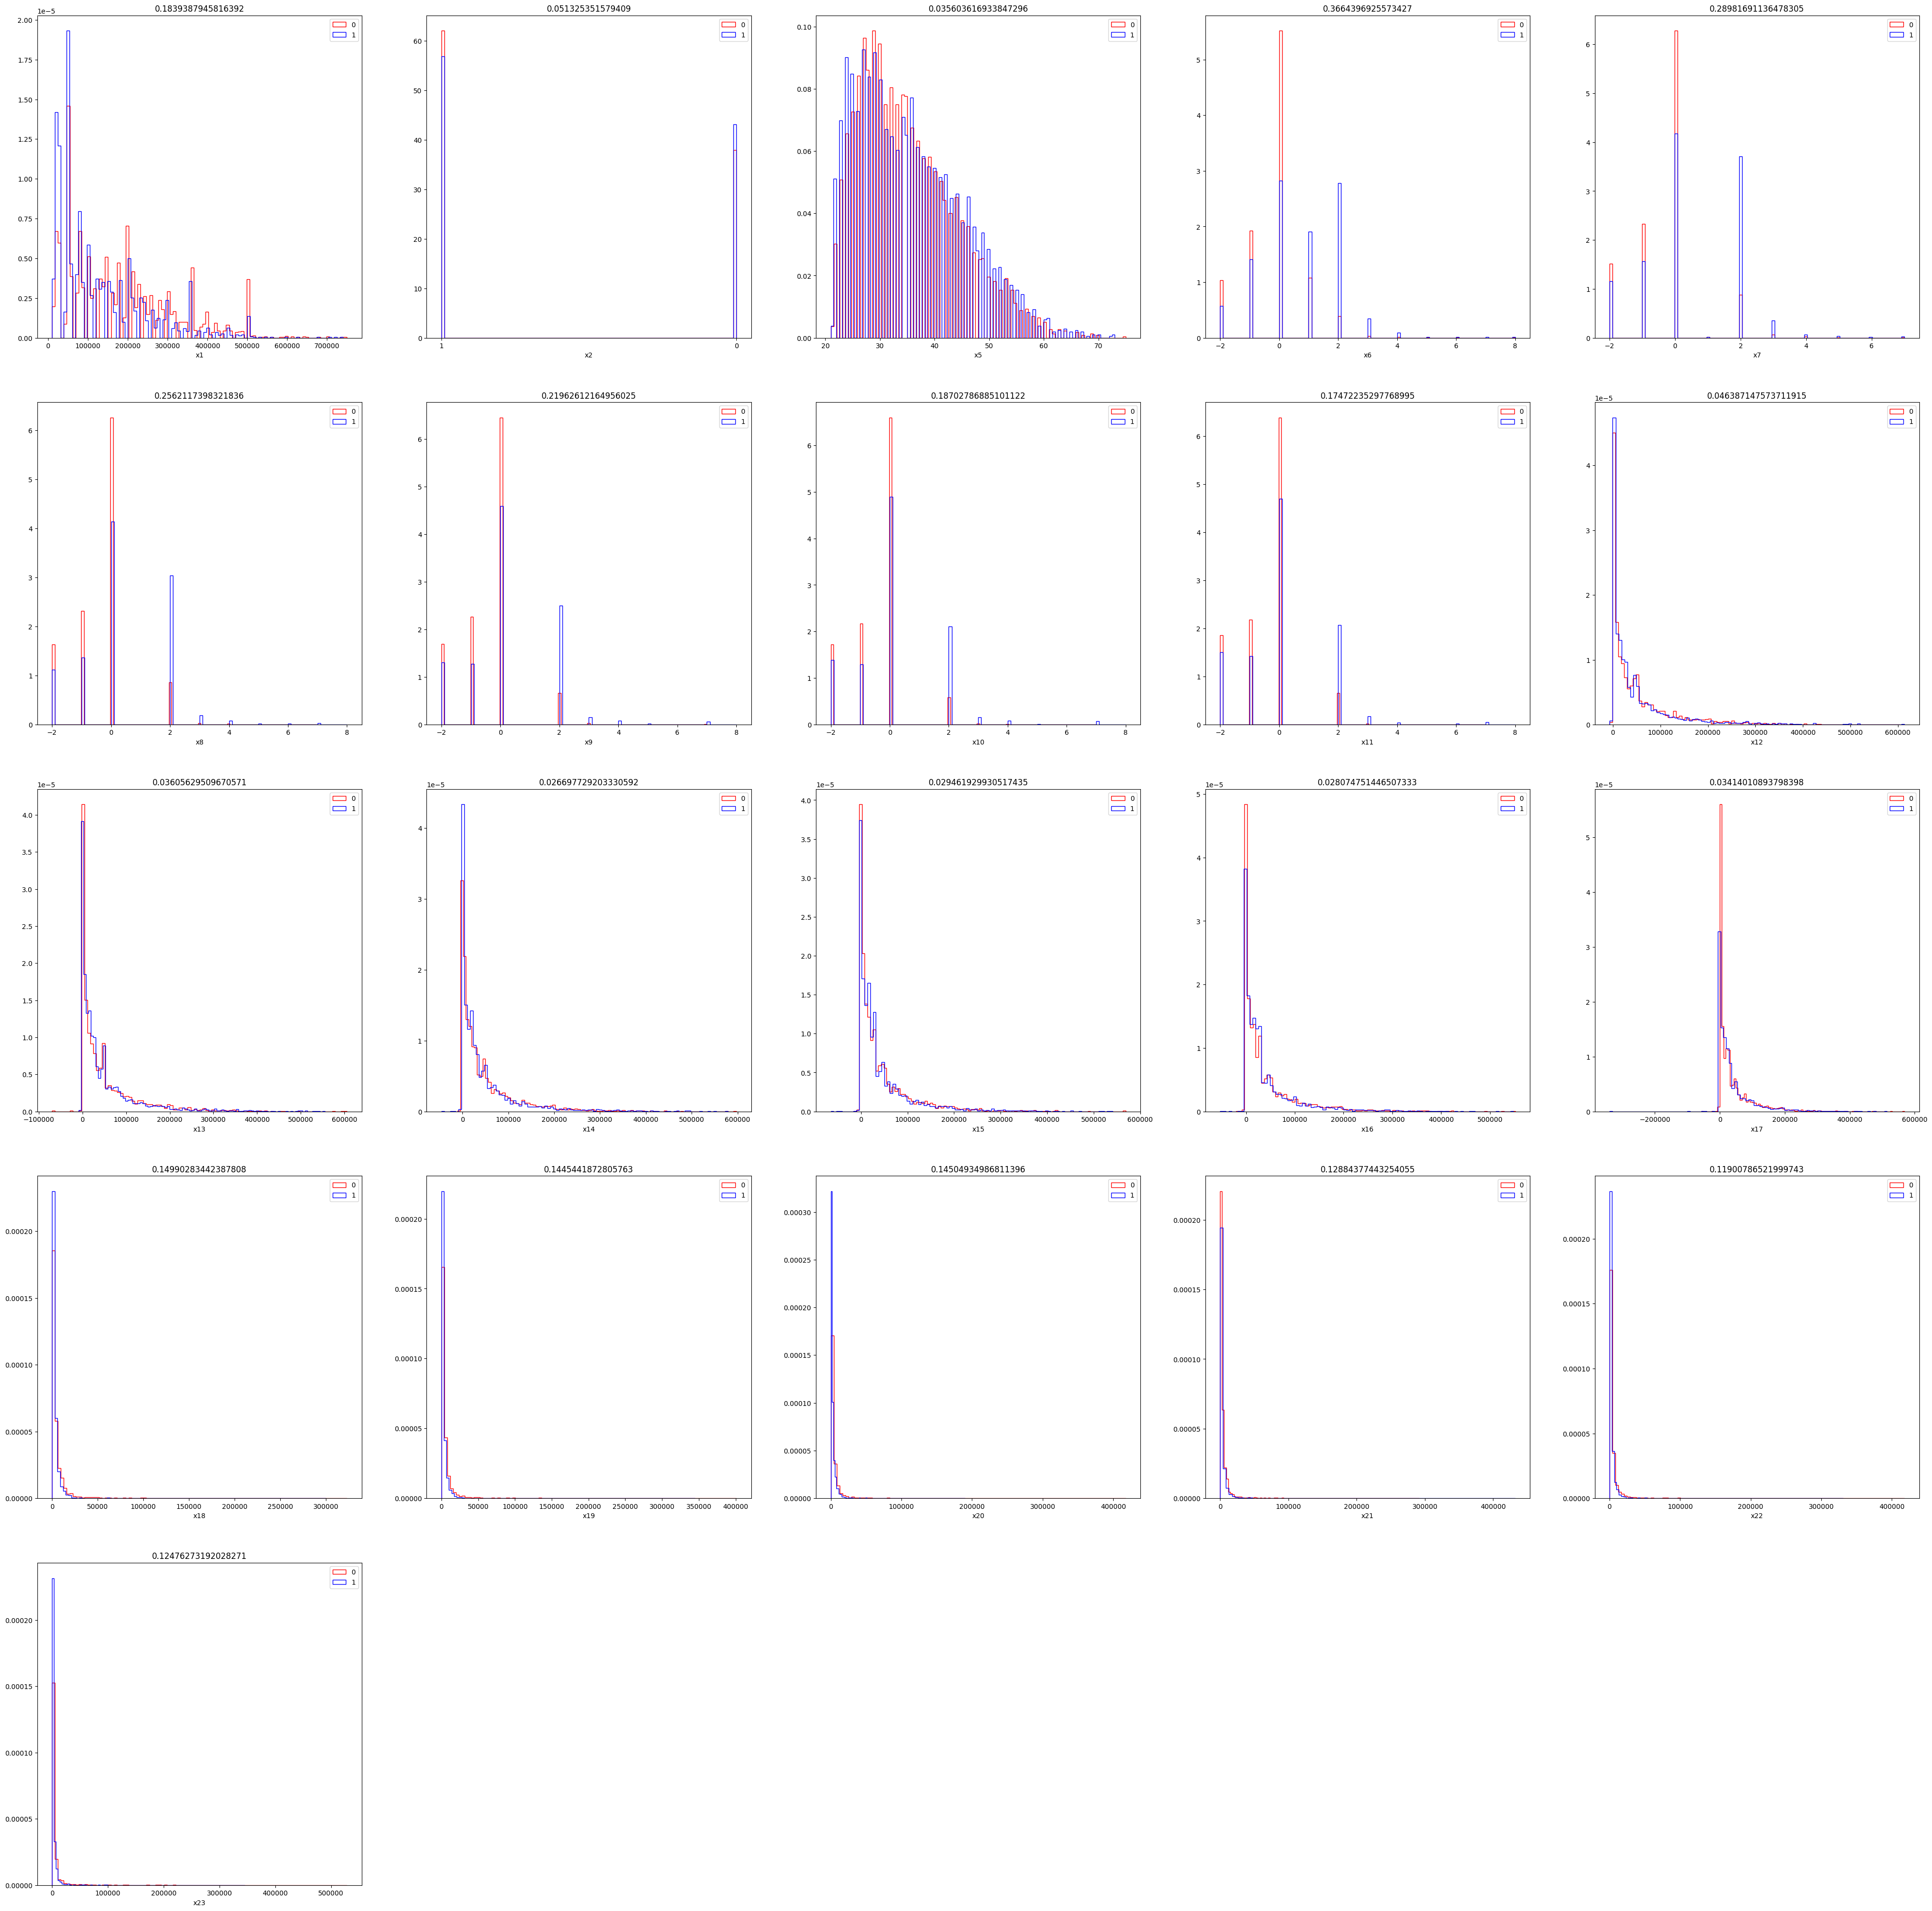

In [38]:
compare_features_binary(d1)

Number of catogory 0: 3977
Number of catogory 1: 3986
Found 21 features. Creating grid of 5 by 5
x1 KS Distribution Similarity Test: 0.1839387945816392
x2 KS Distribution Similarity Test: 0.051325351579409
x5 KS Distribution Similarity Test: 0.035603616933847296
x6 KS Distribution Similarity Test: 0.3664396925573427
x7 KS Distribution Similarity Test: 0.28981691136478305
x8 KS Distribution Similarity Test: 0.2562117398321836
x9 KS Distribution Similarity Test: 0.21962612164956025
x10 KS Distribution Similarity Test: 0.18702786885101122
x11 KS Distribution Similarity Test: 0.17472235297768995
x12 KS Distribution Similarity Test: 0.046387147573711915
x13 KS Distribution Similarity Test: 0.03605629509670571
x14 KS Distribution Similarity Test: 0.026697729203330592
x15 KS Distribution Similarity Test: 0.029461929930517435
x16 KS Distribution Similarity Test: 0.028074751446507333
x17 KS Distribution Similarity Test: 0.03414010893798398
x18 KS Distribution Similarity Test: 0.1499028344238780

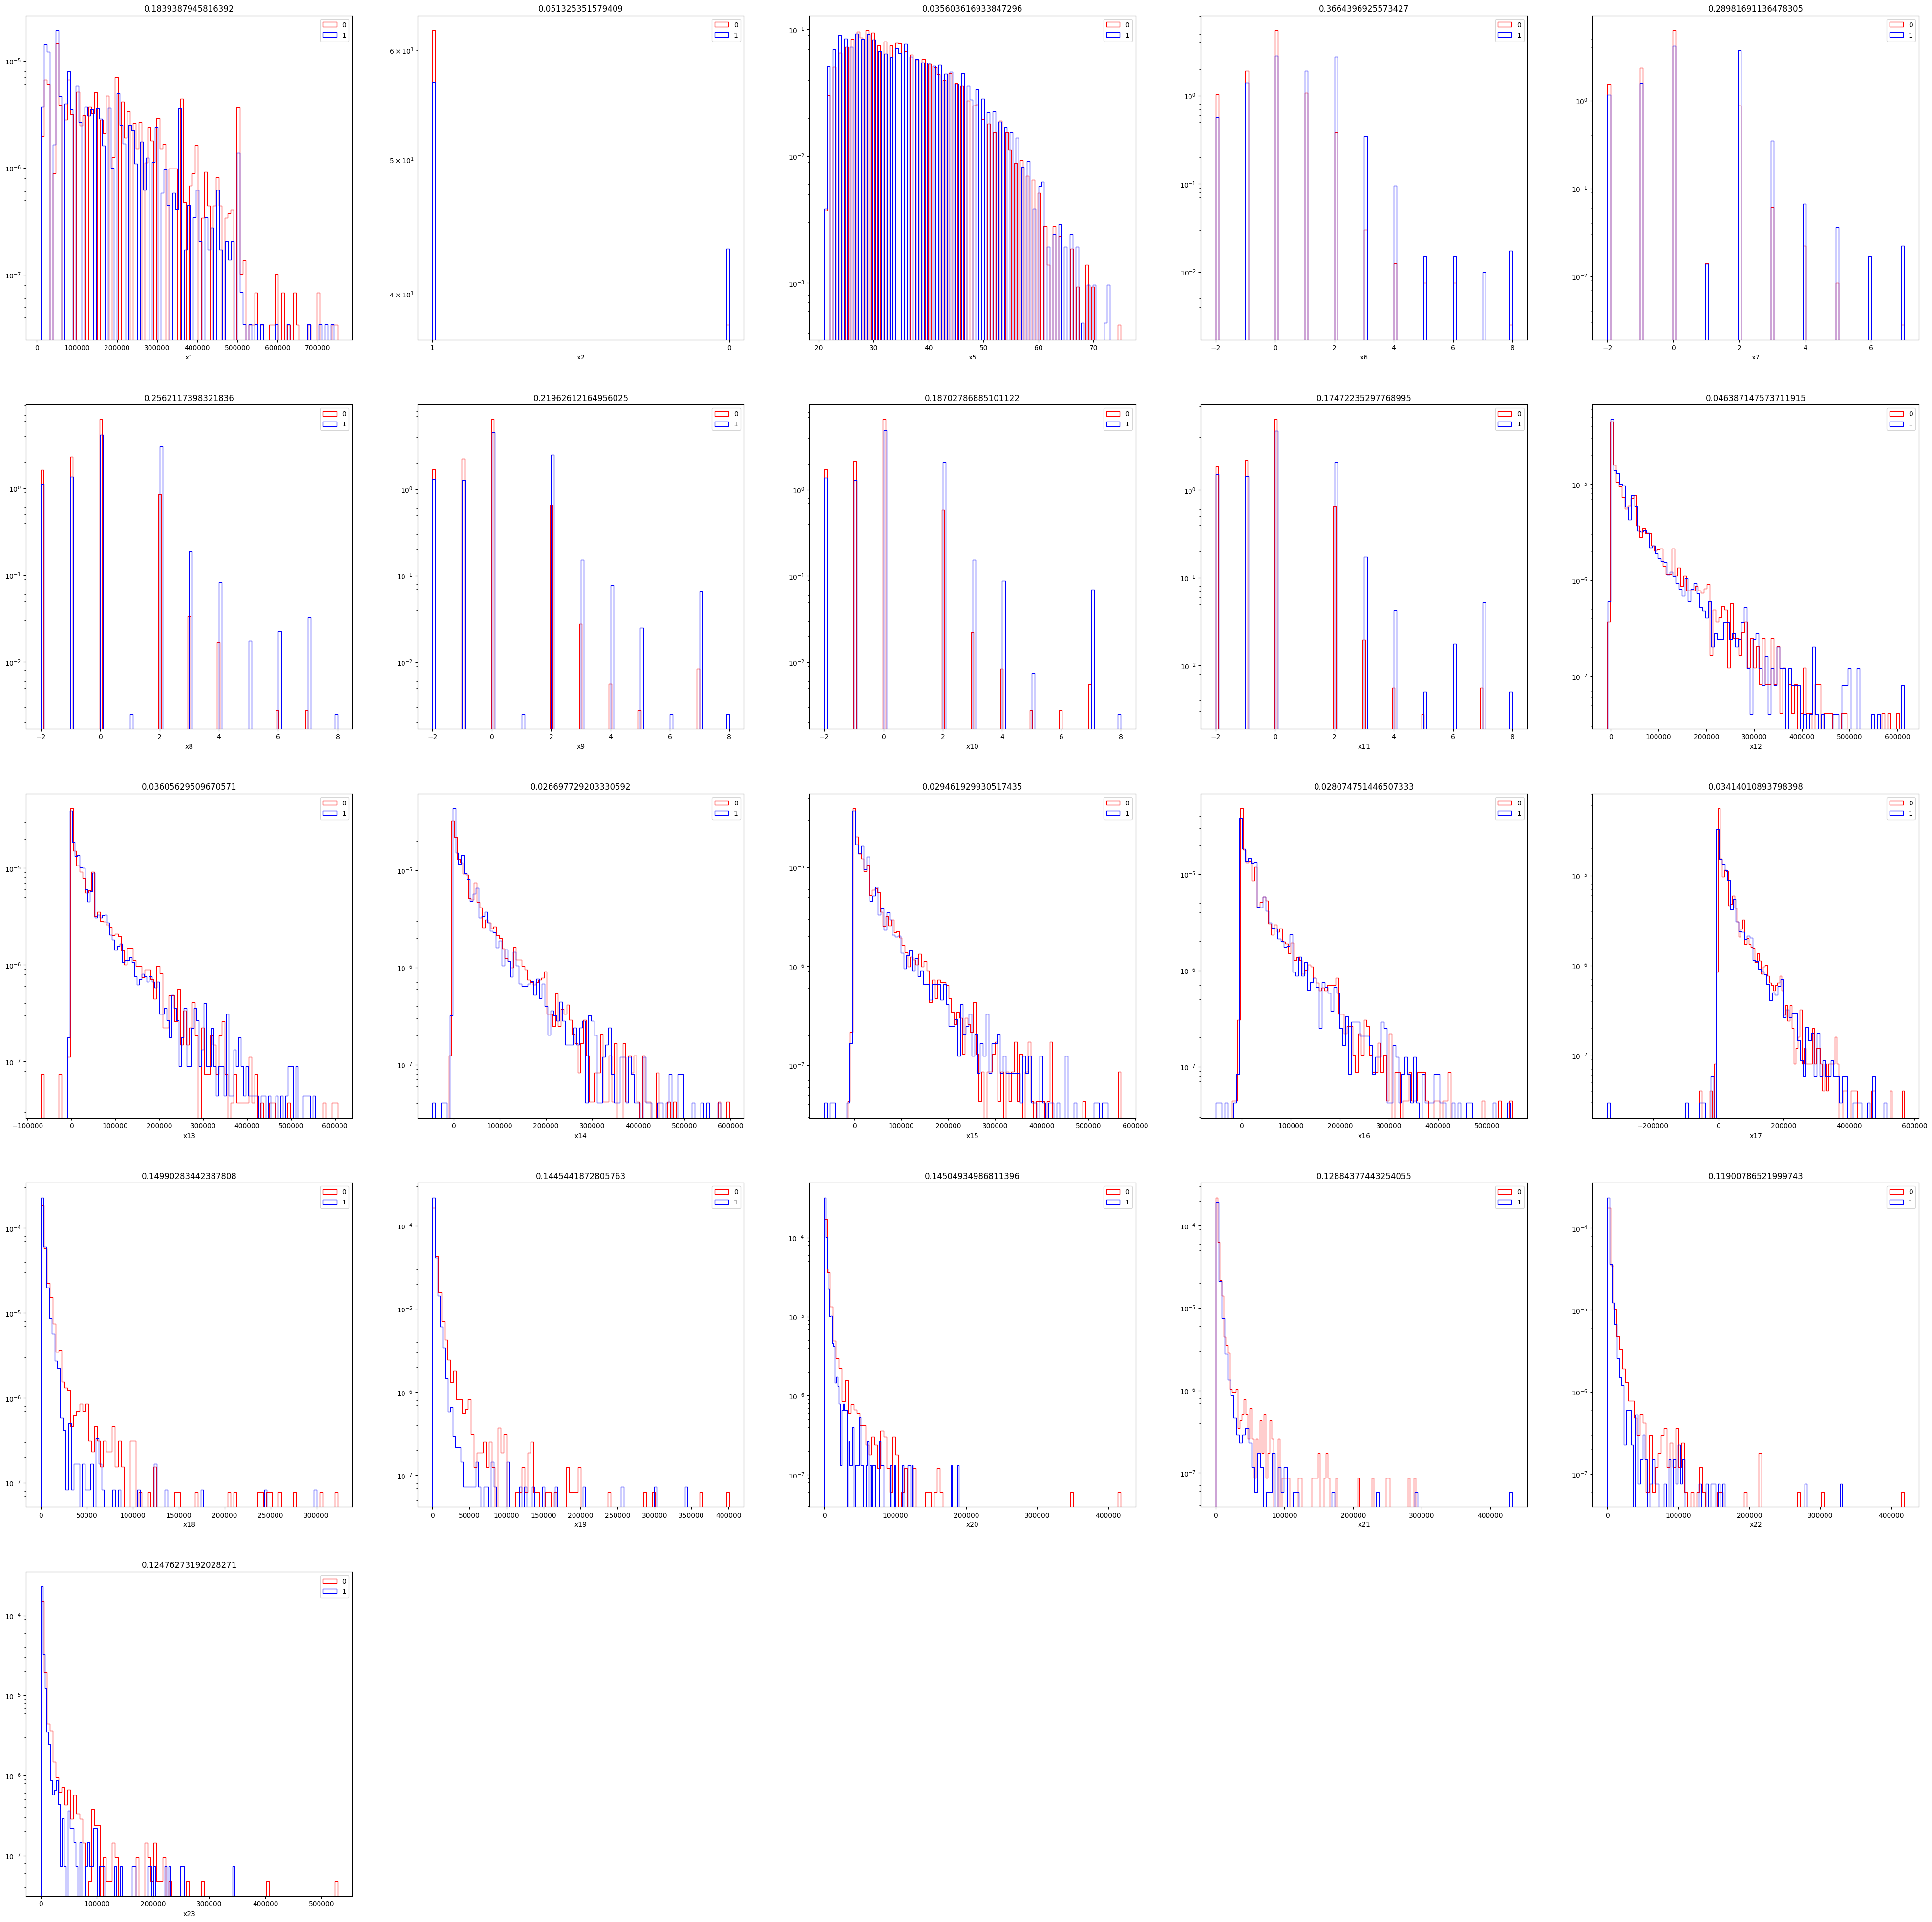

In [39]:
compare_features_binary(load_dataset(binary_classification[0]),True)

## Correlations

In [40]:
c_df = d1["Training"].corr()
c_df

/var/folders/zy/0rgyywr10tq2p0l5lkdf14v80000gq/T/ipykernel_63999/2033704896.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c_df = d1["Training"].corr()


,x1,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
x1,1.000000,0.149513,-0.284907,-0.324708,-0.316446,-0.296943,-0.278341,-0.258535,0.301183,0.291240,0.296278,0.296822,0.300129,0.294138,0.210170,0.222058,0.214939,0.206587,0.227945,0.216992
x5,0.149513,1.000000,-0.036068,-0.041716,-0.043440,-0.030865,-0.034463,-0.037329,0.053037,0.054062,0.056676,0.054305,0.055025,0.052088,0.032014,0.019607,0.018588,0.011756,0.018702,0.026865
x6,-0.284907,-0.036068,1.000000,0.679384,0.581331,0.542094,0.505396,0.467444,0.174717,0.182874,0.182775,0.188796,0.191947,0.187664,-0.085626,-0.079734,-0.084254,-0.072435,-0.041690,-0.067914
x7,-0.324708,-0.041716,0.679384,1.000000,0.773745,0.650241,0.614772,0.576944,0.205327,0.211141,0.210030,0.216376,0.216724,0.217918,-0.092902,-0.076767,-0.068093,-0.061942,-0.031161,-0.050081
x8,-0.316446,-0.043440,0.581331,0.773745,1.000000,0.782179,0.684648,0.641637,0.181102,0.213463,0.210665,0.218093,0.217852,0.217721,-0.007805,-0.088325,-0.058773,-0.050243,-0.025736,-0.045723
x9,-0.296943,-0.030865,0.542094,0.650241,0.782179,1.000000,0.829194,0.728879,0.172159,0.199939,0.223694,0.231051,0.230917,0.229914,-0.017887,-0.006091,-0.083558,-0.044293,-0.030436,-0.037307
x10,-0.278341,-0.034463,0.505396,0.614772,0.684648,0.829194,1.000000,0.829512,0.173290,0.197274,0.217993,0.245320,0.245541,0.243222,-0.015503,-0.008526,-0.003992,-0.066466,-0.027960,-0.035328
x11,-0.258535,-0.037329,0.467444,0.576944,0.641637,0.728879,0.829512,1.000000,0.178161,0.201809,0.218906,0.244848,0.268652,0.267993,-0.008334,-0.020224,-0.003844,0.007773,-0.041615,-0.029676
x12,0.301183,0.053037,0.174717,0.205327,0.181102,0.172159,0.173290,0.178161,1.000000,0.957033,0.911035,0.873626,0.845783,0.826037,0.183261,0.134547,0.149021,0.191080,0.198915,0.188579
x13,0.291240,0.054062,0.182874,0.211141,0.213463,0.199939,0.197274,0.201809,0.957033,1.000000,0.945010,0.910533,0.878828,0.852897,0.289392,0.119838,0.151698,0.178181,0.175650,0.177420


In [41]:
c_matrix=c_df.to_numpy()
c_matrix

array([[ 1.        ,  0.14951263, -0.28490665, -0.32470844, -0.31644601,
        -0.29694311, -0.27834109, -0.25853545,  0.30118321,  0.29123982,
         0.29627803,  0.29682213,  0.30012917,  0.29413768,  0.21016958,
         0.22205836,  0.21493933,  0.20658746,  0.22794467,  0.21699166],
       [ 0.14951263,  1.        , -0.03606811, -0.04171579, -0.04344006,
        -0.03086487, -0.03446274, -0.03732943,  0.05303743,  0.05406185,
         0.05667647,  0.05430509,  0.0550252 ,  0.05208831,  0.03201379,
         0.01960701,  0.01858837,  0.01175605,  0.01870181,  0.02686477],
       [-0.28490665, -0.03606811,  1.        ,  0.67938419,  0.58133117,
         0.5420939 ,  0.50539618,  0.46744394,  0.17471701,  0.18287361,
         0.18277544,  0.18879627,  0.19194747,  0.1876636 , -0.08562629,
        -0.07973385, -0.08425375, -0.07243497, -0.04168992, -0.06791406],
       [-0.32470844, -0.04171579,  0.67938419,  1.        ,  0.77374523,
         0.6502413 ,  0.6147719 ,  0.5769437 ,  

In [42]:
for i in range(c_matrix.shape[0]): c_matrix[i][i]=0.

In [43]:
from collections import OrderedDict
corr_dict=OrderedDict()

for i in range(c_matrix.shape[0]):
    for j in range(c_matrix.shape[0]):
        corr_dict[(i,j)]=c_matrix[i][j]

In [44]:
corr_dict_sorted = OrderedDict(sorted(corr_dict.items(),
                                      key=lambda x: math.fabs(x[1])))

(array([ 12.,  16., 112.,  68., 130.,   2.,   6.,  14.,   8.,  32.]),
 array([-0.32470844, -0.1965343 , -0.06836015,  0.05981399,  0.18798814,
         0.31616228,  0.44433643,  0.57251057,  0.70068471,  0.82885886,
         0.957033  ]),
 <BarContainer object of 10 artists>)

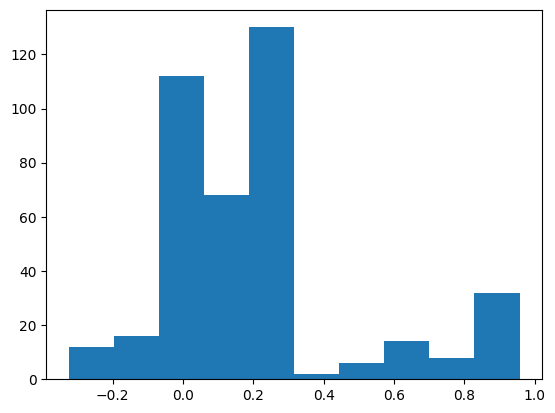

In [45]:
plt.hist(corr_dict_sorted.values())

In [46]:
list(corr_dict_sorted.values())[-1:-25:-1]

[0.9570330035266038,
 0.9570330035266038,
 0.9533876637026473,
 0.9533876637026473,
 0.9506111502999005,
 0.9506111502999005,
 0.9501370303346989,
 0.9501370303346989,
 0.9450097017865612,
 0.9450097017865612,
 0.91502119139515,
 0.91502119139515,
 0.9144297515618338,
 0.9144297515618338,
 0.9110353593896339,
 0.9110353593896339,
 0.910533471699806,
 0.910533471699806,
 0.8814258127122916,
 0.8814258127122916,
 0.8788280314158659,
 0.8788280314158659,
 0.8736256584264133,
 0.8736256584264133]

In [47]:
list(corr_dict_sorted.keys())[-1:-25:-1]

[(9, 8),
 (8, 9),
 (13, 12),
 (12, 13),
 (12, 11),
 (11, 12),
 (11, 10),
 (10, 11),
 (10, 9),
 (9, 10),
 (12, 10),
 (10, 12),
 (13, 11),
 (11, 13),
 (10, 8),
 (8, 10),
 (11, 9),
 (9, 11),
 (13, 10),
 (10, 13),
 (12, 9),
 (9, 12),
 (11, 8),
 (8, 11)]

In [48]:
c_df_0 = d1["Training"][(d1["Target"]==0).to_numpy()].corr()
c_df_1 = d1["Training"][(d1["Target"]==1).to_numpy()].corr()

/var/folders/zy/0rgyywr10tq2p0l5lkdf14v80000gq/T/ipykernel_63999/1597690493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c_df_0 = d1["Training"][(d1["Target"]==0).to_numpy()].corr()
/var/folders/zy/0rgyywr10tq2p0l5lkdf14v80000gq/T/ipykernel_63999/1597690493.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c_df_1 = d1["Training"][(d1["Target"]==1).to_numpy()].corr()


In [49]:
c_matrix_0=c_df_0.to_numpy()
c_matrix_1=c_df_1.to_numpy()
for i in range(c_matrix_0.shape[0]): c_matrix_0[i][i]=0.
for i in range(c_matrix_1.shape[0]): c_matrix_1[i][i]=0.

In [50]:
def matrix_to_dict(c_matrix):
    corr_dict = OrderedDict()
    for i in range(c_matrix.shape[0]):
        for j in range(c_matrix.shape[0]):
            corr_dict[(i,j)]=c_matrix[i][j]
        
    return corr_dict
        

In [51]:
corr_dict_0 = matrix_to_dict(c_matrix_0)
corr_dict_1 = matrix_to_dict(c_matrix_1)

In [52]:
corr_dict_0

OrderedDict([((0, 0), 0.0),
             ((0, 1), 0.15584651331446442),
             ((0, 2), -0.2368135725785172),
             ((0, 3), -0.258838696800342),
             ((0, 4), -0.2535126793258313),
             ((0, 5), -0.22991370513776369),
             ((0, 6), -0.21560064211638424),
             ((0, 7), -0.18653323293904805),
             ((0, 8), 0.2637591283114927),
             ((0, 9), 0.2574043298143193),
             ((0, 10), 0.2682347727971605),
             ((0, 11), 0.27872439171261754),
             ((0, 12), 0.2802585239679577),
             ((0, 13), 0.2821209722537589),
             ((0, 14), 0.21287172641647184),
             ((0, 15), 0.21592379762488562),
             ((0, 16), 0.21494776743270358),
             ((0, 17), 0.20268728772157274),
             ((0, 18), 0.2427441440309055),
             ((0, 19), 0.21479597884404697),
             ((1, 0), 0.15584651331446442),
             ((1, 1), 0.0),
             ((1, 2), -0.054065553569707304),
            

In [53]:
corr_dict_sorted_0 = OrderedDict(sorted(corr_dict_0.items(),
                                      key=lambda x: math.fabs(x[1])))
corr_dict_sorted_1 = OrderedDict(sorted(corr_dict_1.items(),
                                      key=lambda x: math.fabs(x[1])))

In [54]:
corr_dict_sorted_0

OrderedDict([((0, 0), 0.0),
             ((1, 1), 0.0),
             ((2, 2), 0.0),
             ((3, 3), 0.0),
             ((4, 4), 0.0),
             ((5, 5), 0.0),
             ((6, 6), 0.0),
             ((7, 7), 0.0),
             ((8, 8), 0.0),
             ((9, 9), 0.0),
             ((10, 10), 0.0),
             ((11, 11), 0.0),
             ((12, 12), 0.0),
             ((13, 13), 0.0),
             ((14, 14), 0.0),
             ((15, 15), 0.0),
             ((16, 16), 0.0),
             ((17, 17), 0.0),
             ((18, 18), 0.0),
             ((19, 19), 0.0),
             ((6, 18), -0.005157010532674403),
             ((18, 6), -0.005157010532674403),
             ((4, 18), 0.005321023930493442),
             ((18, 4), 0.005321023930493442),
             ((5, 18), -0.0060457693939137205),
             ((18, 5), -0.0060457693939137205),
             ((7, 16), 0.0066850464726745645),
             ((16, 7), 0.0066850464726745645),
             ((7, 15), 0.007672717842505875)

In [55]:
list(zip(list(corr_dict_sorted_0.keys())[-1:-25:-1],list(corr_dict_sorted_1.keys())[-1:-25:-1]))

[((13, 12), (9, 8)),
 ((12, 13), (8, 9)),
 ((12, 11), (10, 9)),
 ((11, 12), (9, 10)),
 ((9, 8), (11, 10)),
 ((8, 9), (10, 11)),
 ((11, 10), (12, 11)),
 ((10, 11), (11, 12)),
 ((10, 9), (13, 12)),
 ((9, 10), (12, 13)),
 ((13, 11), (11, 9)),
 ((11, 13), (9, 11)),
 ((12, 10), (10, 8)),
 ((10, 12), (8, 10)),
 ((10, 8), (12, 10)),
 ((8, 10), (10, 12)),
 ((11, 9), (13, 11)),
 ((9, 11), (11, 13)),
 ((13, 10), (11, 8)),
 ((10, 13), (8, 11)),
 ((12, 9), (12, 9)),
 ((9, 12), (9, 12)),
 ((11, 8), (13, 10)),
 ((8, 11), (10, 13))]

In [56]:
list(zip(list(corr_dict_sorted_0.values())[-1:-25:-1],list(corr_dict_sorted_1.values())[-1:-25:-1]))

[(0.9499147315177627, 0.9738914942451165),
 (0.9499147315177627, 0.9738914942451165),
 (0.9402603085150995, 0.9629475051217274),
 (0.9402603085150995, 0.9629475051217274),
 (0.9394324952085749, 0.9617823737124946),
 (0.9394324952085749, 0.9617823737124946),
 (0.9377481456048278, 0.9604117680976006),
 (0.9377481456048278, 0.9604117680976006),
 (0.925997638031567, 0.9569341614653629),
 (0.925997638031567, 0.9569341614653629),
 (0.903156873194596, 0.935265073804128),
 (0.903156873194596, 0.935265073804128),
 (0.9027414965497884, 0.9351442009972297),
 (0.9027414965497884, 0.9351442009972297),
 (0.8857972561576166, 0.9266768008057209),
 (0.8857972561576166, 0.9266768008057209),
 (0.8843474939851124, 0.9255931926012962),
 (0.8843474939851124, 0.9255931926012962),
 (0.8715024390751147, 0.9060421811564859),
 (0.8715024390751147, 0.9060421811564859),
 (0.8555443313656171, 0.901009639867226),
 (0.8555443313656171, 0.901009639867226),
 (0.8397287919563637, 0.8912854523280844),
 (0.839728791956363

## Multiclass

In [57]:
def compare_features_multiclass(d,selections,logscale=False):
    # Divide the data into separate dfs for the two categories
    
    dfs = dict()
    for name,selection in selections.items():
        dfs[name] = d["Training"][eval(selection).to_numpy()]
        print("Number of catogory 0:",dfs[name])
        
    # Make a grid of plots
    N_Features = d["Training"].shape[1]
    N_X= math.ceil(math.sqrt(N_Features))
    N_Y= math.floor(math.sqrt(N_Features))
    if N_X*N_Y<N_Features:
        N_Y+=1

    print("Found",N_Features,"features. Creating grid of",N_X,"by",N_Y)
    
    # Histogram Features
    plt.figure(figsize=(50,50))

    for i,column in enumerate(d["Training"].columns):
        #KS_test=scipy.stats.kstest(df_0[column],df_1[column]).statistic
        #print(column,"KS Distribution Similarity Test:", KS_test)
        
        plt.subplot(N_X,N_Y,i+1)
        #plt.title(str(KS_test))
        if logscale:
            plt.yscale("log")
        for name,selection in selections.items():
            plt.hist(dfs[name][column],bins=100, histtype="step",label=name,density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)
        
    plt.show()

In [58]:
d2= load_dataset(multi_classification[10])

In [59]:
np.unique(d2["Target"])

array([3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Number of catogory 0:       Precinct Sector  Occurred_hour  Occurred_min
26765        0      5              0             0
46157        4      7              4             4
22874        1      0              0             0
30550        3      4              0             0
4143         2     14              0             0
...        ...    ...            ...           ...
27890        4     12              0             0
48033        4     12              0             0
26557        4     12             19            19
14541        4      9             22            22
19118        3     16             22            22

[1885 rows x 4 columns]
Number of catogory 0:       Precinct Sector  Occurred_hour  Occurred_min
8742         4      7              0             1
5953         1      6             22            22
29470        4      9              0             1
4022         1      8             20            20
11540        1      0              0             1
9373         

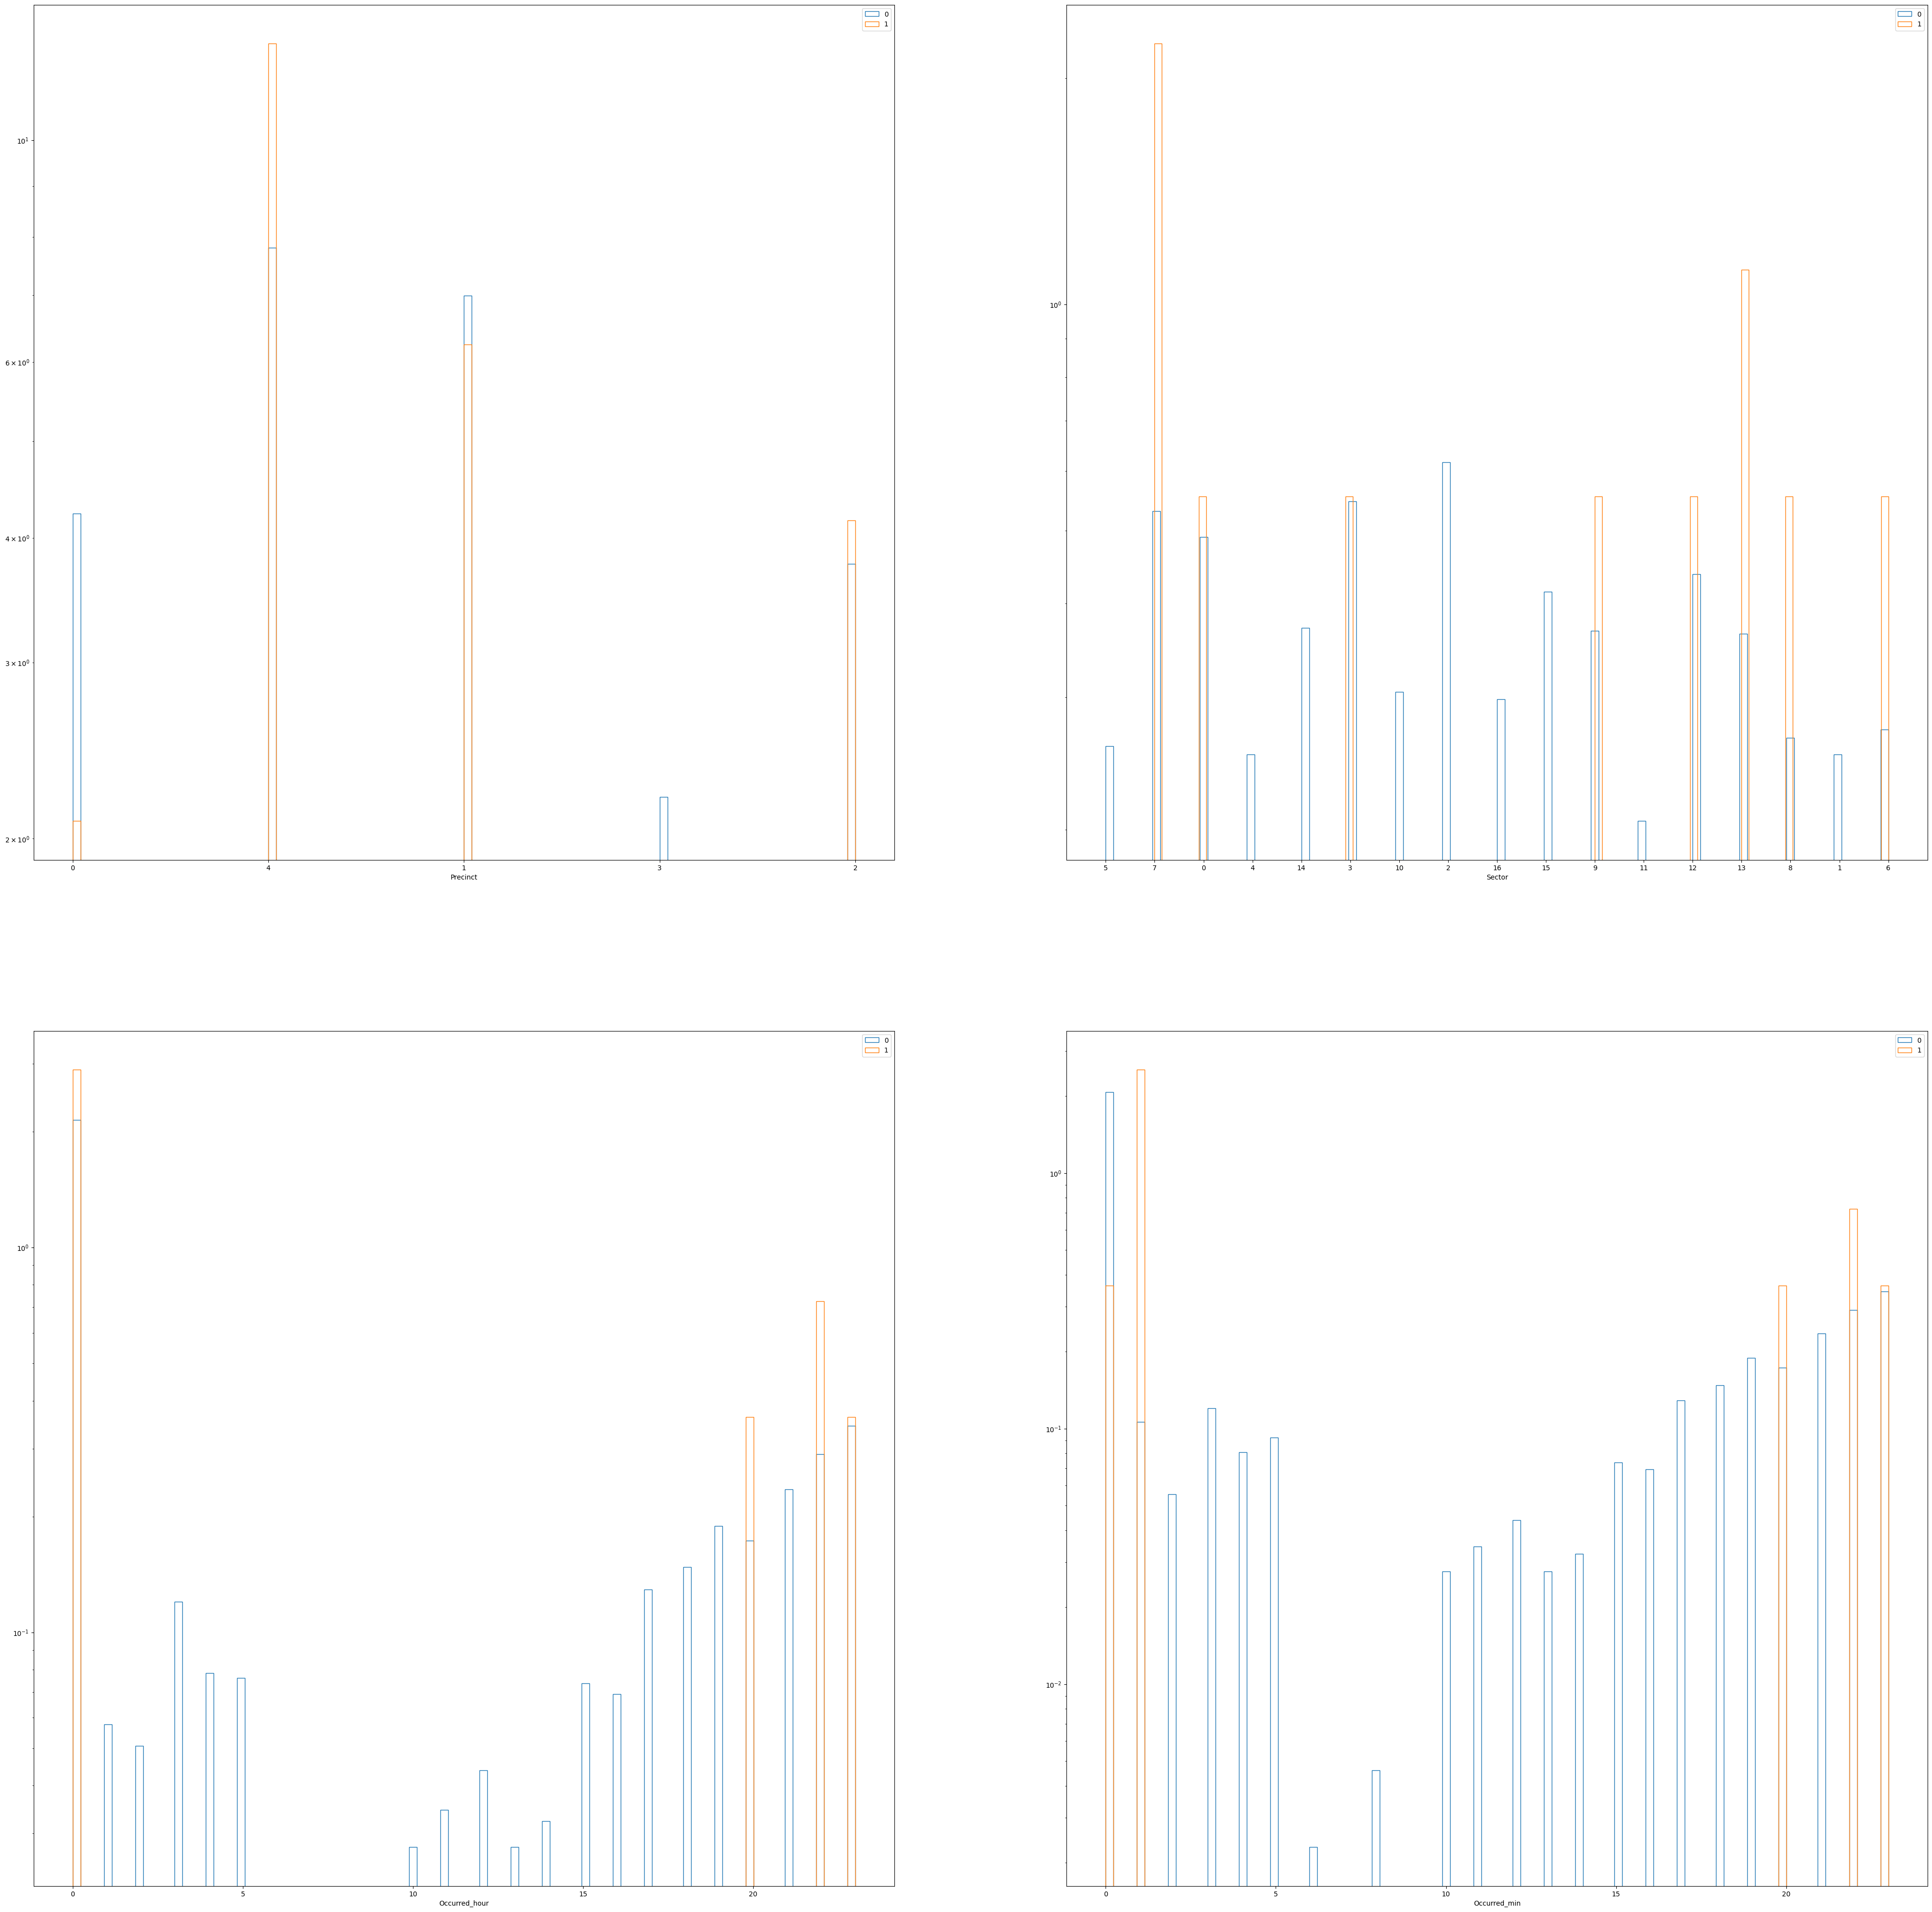

In [60]:
compare_features_multiclass(load_dataset(multi_classification[1]),
                        {"0":"d['Target']==0",
                        "1":"d['Target']==1",
                         "1":"d['Target']==1"
                        },
                        True)

## Trying ML Algorithm



In [61]:
d1["Training"].shape

(7963, 21)

In [62]:
import math

N_total = d1["Training"].shape[0]
N_train = math.floor(.8*N_total)
N_val = math.floor((N_total-N_train)/2.)
N_test = math.floor((N_total-N_train)/2.)

X_train = d1["Training"][:N_train]
Y_train = d1["Target"][:N_train]

X_val = d1["Training"][N_train:N_val+N_train]
Y_val = d1["Target"][N_train:N_val+N_train]
                     
X_test = d1["Training"][N_train+N_val:N_test+N_val+N_train]
Y_test = d1["Target"][N_train+N_val:N_test+N_val+N_train]

N_val

796

In [63]:
import sklearn.discriminant_analysis as DA
# Instanciate Method
Fisher=DA.LinearDiscriminantAnalysis()

In [64]:
Fisher.fit(X_train,Y_train)

/Users/afarbin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [65]:
Fisher.predict(X_val.to_numpy())

/Users/afarbin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [66]:
X_val_0 = X_val[Y_val.to_numpy()==0]
X_val_1 = X_val[Y_val.to_numpy()==1]

/Users/afarbin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/afarbin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


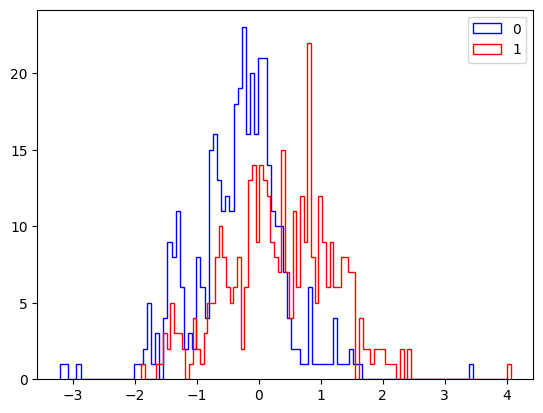

In [67]:
plt.figure()
plt.hist(Fisher.decision_function(X_val_0.to_numpy()),bins=100,histtype="step", color="blue", label="0",stacked=True)
plt.hist(Fisher.decision_function(X_val_1.to_numpy()),bins=100,histtype="step", color="red", label="1",stacked=True)
plt.legend(loc='upper right')
plt.show()

/Users/afarbin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


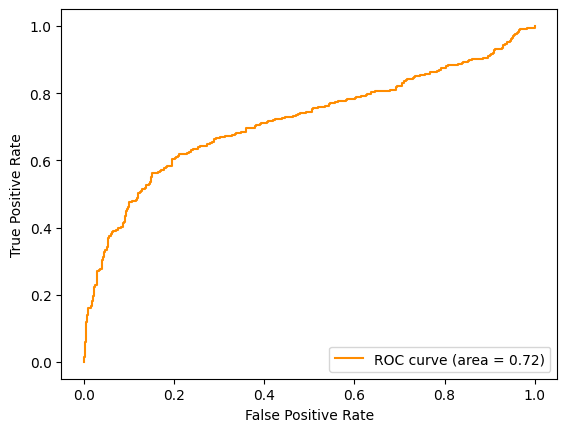

In [68]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test.to_numpy(), Fisher.decision_function(X_test.to_numpy()))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [69]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



In [70]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]
classifier_instances = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
classifiers = dict(zip(names,classifier_instances))

In [71]:
datasets = { name : (d["Training"],d["Target"]) for name , d in [(name , load_dataset(name)) for name in binary_classification_datasets]}

In [72]:
classifiers.keys()

dict_keys(['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Gaussian Process', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost', 'Naive Bayes', 'QDA'])

In [73]:
#figure = plt.figure(figsize=(27, 9))
# iterate over datasets
import sys

def fit_all(datasets,classifiers, max_ds=None, max_cls=None):
    scores = dict()
    for ds_cnt, (ds_name,ds) in enumerate(datasets.items()):
        # preprocess dataset, split into training and test part
        X, y = ds
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=42
        )

        if max_ds:
            if ds_cnt>max_ds:
                print("Max Datasets Reached.")
                sys.stdout.flush()
                break
                
        scores[ds_name] = dict()
        # iterate over classifiers
        for cls_cnt,(cls_name, clf) in enumerate(classifiers.items()):
            print(ds_cnt,cls_cnt,"Running classifier",cls_name,"on dataset",ds_name,". N_Train = ",X_train.shape[0] )
            sys.stdout.flush()
            clf_0 = make_pipeline(StandardScaler(), clf)
            clf_0.fit(X_train.to_numpy(), y_train.to_numpy().reshape((len(y_train),)))
            score = clf.score(X_test.to_numpy(), y_test.to_numpy())

            scores[ds_name][cls_name] = score
            if max_cls:
                if cls_cnt>max_cls:
                    print("Max Classifiers Reached.")
                    sys.stdout.flush()
                    break


    return scores
        

#plt.tight_layout()
#plt.show()

In [74]:
scores = fit_all(datasets,classifiers,1,2)

0 0 Running classifier Nearest Neighbors on dataset 334_361283 . N_Train =  4777
0 1 Running classifier Linear SVM on dataset 334_361283 . N_Train =  4777
0 2 Running classifier RBF SVM on dataset 334_361283 . N_Train =  4777
0 3 Running classifier Gaussian Process on dataset 334_361283 . N_Train =  4777
Max Classifiers Reached.
1 0 Running classifier Nearest Neighbors on dataset 334_361282 . N_Train =  20970
1 1 Running classifier Linear SVM on dataset 334_361282 . N_Train =  20970
1 2 Running classifier RBF SVM on dataset 334_361282 . N_Train =  20970
1 3 Running classifier Gaussian Process on dataset 334_361282 . N_Train =  20970


/Users/afarbin/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/afarbin/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Max Classifiers Reached.
Max Datasets Reached.


In [75]:
scores

{'334_361283': {'Nearest Neighbors': 0.5012554927809165,
  'Linear SVM': 0.5018832391713748,
  'RBF SVM': 0.4981167608286252,
  'Gaussian Process': 0.5018832391713748},
 '334_361282': {'Nearest Neighbors': 0.5395179171733067,
  'Linear SVM': 0.5756383663543381,
  'RBF SVM': 0.4965310063657821,
  'Gaussian Process': 0.4965310063657821}}

In [76]:
display(HTML(tabulate.tabulate(list(map(lambda x: [x[0]]+x[1],zip(scores.keys(),map(lambda x: list(x.values()),scores.values())))), 
                               tablefmt='html',
                               headers=[" "]+list(next(iter(scores.items()))[1].keys()))))

,Nearest Neighbors,Linear SVM,RBF SVM,Gaussian Process
334_361283,0.501255,0.501883,0.498117,0.501883
334_361282,0.539518,0.575638,0.496531,0.496531
